# Probleem: Prim neemt index waardes mee

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

We perform scenario discovery on the no policy data
On this data, we hope to identify uncertainties that are relevant to our performance indicators 

In [18]:
data = pd.read_csv("Prepared Data/no_policy_results.csv")

In [19]:
data

,DamFunctTbl,ShipTbl1,ShipTbl2,ShipTbl3,climate scenarios,collaboration,fragility dikes,land use scenarios,model,policy,Costs,Flood damage (Milj. Euro),Number of casualties
0,0.087079,-0.099765,0.012521,0.004889,4,1.027529,-0.000730,NoChange,waas,no policy,0.0,0.0,0.00000
1,-0.049932,0.027524,-0.063382,-0.038642,1,1.090472,0.064607,sustainableGrowth,waas,no policy,0.0,0.0,0.00000
2,0.000689,0.053957,0.011592,-0.035819,9,1.528232,-0.018495,sustainableGrowth,waas,no policy,0.0,0.0,0.00000
3,0.049930,-0.064429,0.021346,0.040681,9,1.597576,0.020117,sustainableGrowth,waas,no policy,0.0,0.0,0.00000
4,-0.034240,0.099629,-0.001652,0.005038,9,1.541525,-0.064460,moreNature,waas,no policy,0.0,0.0,0.00000
5,0.067516,0.091661,0.008100,0.037102,26,1.047498,-0.048132,NoChange,waas,no policy,0.0,1309.0,8.88000
6,-0.044500,-0.085645,-0.083127,-0.011560,6,1.323807,-0.075116,urbanizationLargeAndFast,waas,no policy,0.0,0.0,0.00000
7,0.062545,-0.028357,0.008954,0.046831,11,1.469236,0.069999,urbanizationLargeSteady,waas,no policy,0.0,2883.0,23.13790
8,0.069734,-0.039221,-0.057587,0.072311,17,1.593176,-0.065344,sustainableGrowth,waas,no policy,0.0,2373.0,19.60000
9,0.090480,0.026876,-0.076823,0.078790,3,1.102389,0.063424,NoChange,waas,no policy,0.0,1339.0,8.88390


In [20]:
data.columns

Index(['DamFunctTbl', 'ShipTbl1', 'ShipTbl2', 'ShipTbl3', 'climate scenarios',
       'collaboration', 'fragility dikes', 'land use scenarios', 'model',
       'policy', 'Costs', 'Flood damage (Milj. Euro)', 'Number of casualties'],
      dtype='object')

In [21]:
data.columns[12]

'Number of casualties'

In [22]:
objs_cols = data.columns[-2:]

In [23]:
unc_cols = data.columns[:-6]

In [24]:
# Uncertaint columns
unc_cols

Index(['DamFunctTbl', 'ShipTbl1', 'ShipTbl2', 'ShipTbl3', 'climate scenarios',
       'collaboration', 'fragility dikes'],
      dtype='object')

In [25]:
x = data[unc_cols]
y = data.ix[:,12]


In [27]:
x.reset_index(drop=True)

,DamFunctTbl,ShipTbl1,ShipTbl2,ShipTbl3,climate scenarios,collaboration,fragility dikes
0,0.087079,-0.099765,0.012521,0.004889,4,1.027529,-0.000730
1,-0.049932,0.027524,-0.063382,-0.038642,1,1.090472,0.064607
2,0.000689,0.053957,0.011592,-0.035819,9,1.528232,-0.018495
3,0.049930,-0.064429,0.021346,0.040681,9,1.597576,0.020117
4,-0.034240,0.099629,-0.001652,0.005038,9,1.541525,-0.064460
5,0.067516,0.091661,0.008100,0.037102,26,1.047498,-0.048132
6,-0.044500,-0.085645,-0.083127,-0.011560,6,1.323807,-0.075116
7,0.062545,-0.028357,0.008954,0.046831,11,1.469236,0.069999
8,0.069734,-0.039221,-0.057587,0.072311,17,1.593176,-0.065344
9,0.090480,0.026876,-0.076823,0.078790,3,1.102389,0.063424


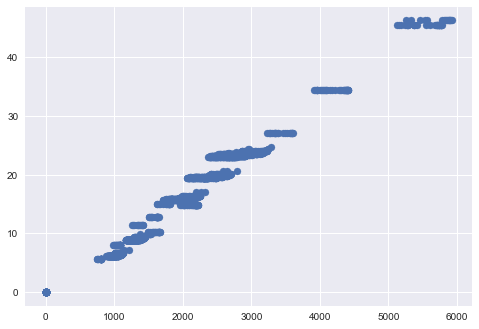

In [32]:
plt.scatter(data[['Flood damage (Milj. Euro)']],data[['Number of casualties']])
plt.show()

From the above scatterplot, we see that the flood damage and the number of casualties is linearly correlated.

For ethical reasons we choose Number of casaulties as the most important objective to be minimized

In [28]:
x = x.to_records(index=False)

In [29]:
x

rec.array([ (0.08707903151615001, -0.0997653049447387, 0.012521072071883244, 0.004888898396691378, 4, 1.0275292411401726, -0.0007298786037426008),
 (-0.04993156666716763, 0.027523714072299255, -0.06338217855300744, -0.038641520140943963, 1, 1.0904719202468414, 0.06460734605880161),
 (0.0006888334004608588, 0.05395749073701539, 0.011592283749566735, -0.035818547299686795, 9, 1.528231651274356, -0.01849528216886984),
 ...,
 (0.06631664743681784, -0.015096100734199732, -0.00678286172223655, 0.04698447435566069, 27, 1.4627519450291109, 0.0688187767513006),
 (0.05571127969648152, -0.04376057641701823, 0.02377448017349941, 0.047513964807002006, 28, 1.2635436227011247, 0.017113755467750142),
 (-0.05879312894783816, 0.06377031772754438, -0.021160841921630882, -0.05881956419933716, 14, 1.0231742579833687, -0.07322705176081555)], 
          dtype=[('DamFunctTbl', '<f8'), ('ShipTbl1', '<f8'), ('ShipTbl2', '<f8'), ('ShipTbl3', '<f8'), ('climate scenarios', '<i8'), ('collaboration', '<f8'), ('fragi

In [30]:
y = y.values

In [31]:
from ema_workbench.analysis import prim

In [32]:
from ema_workbench import ema_logging

In [33]:
ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

we set the peeling alpha to 0.1. The peeling alpha determines how much data is peeled off in each iteration of the algorithm. The lower the value, the less data is removed in each iteration. The minimium coverage threshold that a box should meet is set to 0.8.

In [34]:
prim_alg = prim.Prim(x,y,threshold=0.8, peel_alpha=0.1)

In [35]:
box1 = prim_alg.find_box()

[MainProcess/INFO] 5000 points remaining, containing 2270 cases of interest
[MainProcess/INFO] mean: 13.871404911660775, mass: 0.0566, coverage: 0.09162995594713656, density: 0.734982332155477 restricted_dimensions: 5.0


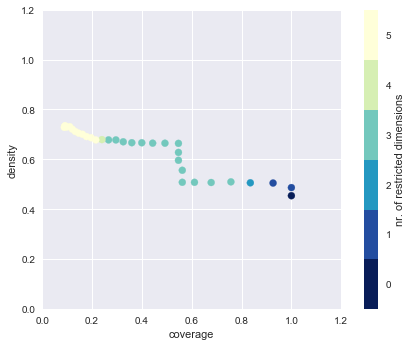

In [36]:
box1.show_tradeoff()
plt.show()

coverage     0.546696
density      0.663991
mass         0.373800
mean        11.099679
res dim      3.000000
Name: 11, dtype: float64

                      box 11                     
                         min        max qp values
ShipTbl1           -0.079324   0.099965       NaN
ShipTbl2           -0.099974   0.045494       NaN
climate scenarios  11.000000  27.000000       NaN



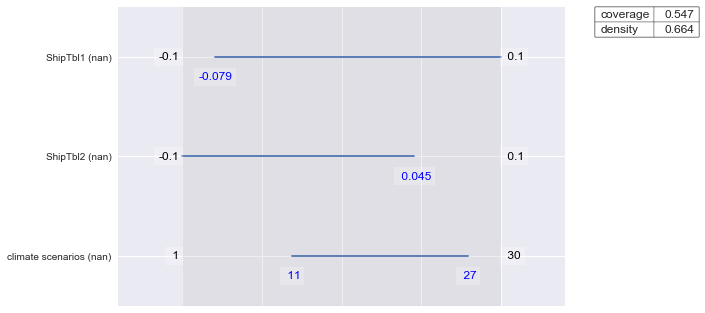

In [43]:
box1.inspect(11)
box1.inspect(11,style='graph')
plt.show()

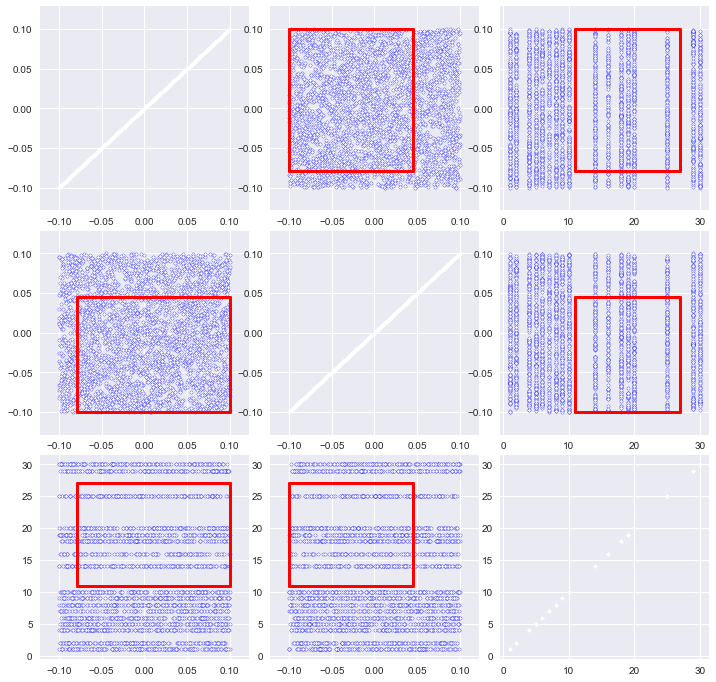

In [47]:
box1.select(11)
fig = box1.show_pairs_scatter()
fig.set_size_inches((12,12))
plt.show()
# box1.show_pairs_scatter()
# plt.show()